In [7]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
prtfolio=['AMZ','FB','AAPL','NFLX','GOOG']

In [9]:
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [10]:
stockStartDate='2014-01-01'

In [11]:
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-04-22'

In [12]:
df=pd.DataFrame()

for stock in prtfolio:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [13]:
df.head()

,AMZ,FB,AAPL,NFLX,GOOG
Date,,,,,
2014-01-02,290.350006,54.709999,17.598297,51.831429,554.481689
2014-01-03,293.549988,54.560001,17.211735,51.871429,550.436829
2014-01-06,286.549988,57.200001,17.305593,51.367142,556.573853
2014-01-07,292.549988,57.919998,17.181829,48.500000,567.303589
2014-01-08,294.549988,58.230000,17.290642,48.712856,568.484192


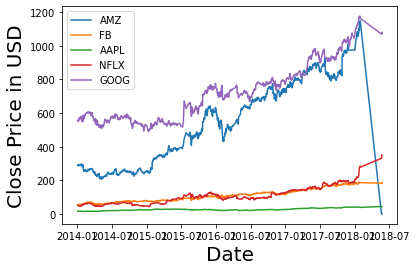

In [14]:
for c in df.columns.values:
  plt.plot(df[c],label=c)

plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price in USD',fontsize=20)
plt.legend(df.columns.values, loc='upper left')
plt.show()

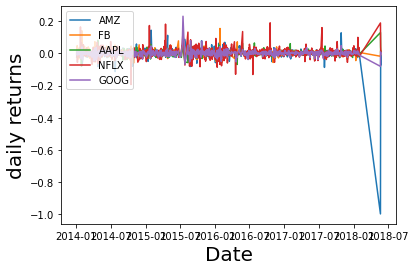

In [15]:
returns=df.pct_change()

for c in returns.columns.values:
  plt.plot(returns[c],label=c)

plt.xlabel('Date',fontsize=20)
plt.ylabel('daily returns',fontsize=20)
plt.legend(returns.columns.values, loc='upper left')
plt.show()


In [16]:
annual_cov=returns.cov()*252
annual_cov

,AMZ,FB,AAPL,NFLX,GOOG
AMZ,0.375985,0.036780,-0.019009,-0.013053,0.054539
FB,0.036780,0.083427,0.025896,0.046697,0.041246
AAPL,-0.019009,0.025896,0.059906,0.035000,0.021230
NFLX,-0.013053,0.046697,0.035000,0.214144,0.048401
GOOG,0.054539,0.041246,0.021230,0.048401,0.063414


In [17]:
prtfolio_variance=np.dot(weights.T, np.dot(annual_cov, weights.T))
prtfolio_variance

0.05409311321075296

In [18]:
prtfolio_vol=np.sqrt(prtfolio_variance)
prtfolio_vol

0.23257926221130068

In [19]:
annual_return=np.sum(returns.mean()*weights)*252
annual_return

0.3258760293015913

In [20]:
prct_return=str(round(annual_return, 3)*100) +'%'
prct_var=str(round(prtfolio_variance, 2)*100) +'%'
prct_vol=str(round(prtfolio_vol, 2)*100) +'%'

In [21]:
print('Expected annual returns: ', prct_return)
print('Volatility/ Risk: ', prct_vol)
print('Annual Variance: ',prct_var)

Expected annual returns:  32.6%
Volatility/ Risk:  23.0%
Annual Variance:  5.0%


In [22]:
pip install PyPortfolioOpt

In [23]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [25]:
mean=expected_returns.mean_historical_return(df)
s=risk_models.sample_cov(df)

ef=EfficientFrontier(mean,s)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMZ', 0.0), ('FB', 0.36745), ('AAPL', 0.32081), ('NFLX', 0.31174), ('GOOG', 0.0)])
Expected annual return: 44.9%
Annual volatility: 24.9%
Sharpe Ratio: 1.72


(0.44949353660080227, 0.24908865899985194, 1.7242597006436071)

In [27]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [28]:
latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights, latest_prices,total_portfolio_value=50000, short_ratio=None)
allocation, leftover=da.lp_portfolio()
print('Funds allocated: ', allocation)
print('Funds remaining: ', leftover)

Funds allocated:  {'FB': 100, 'AAPL': 351, 'NFLX': 44}
Funds remaining:  24.324119567871094
